In [1]:
import pandas as pd

In [20]:
dfmm=pd.DataFrame( [ {'key':'A', 'data':8, 'price':80} , 
                     {'key':'B', 'data':7, 'price':50} ,
                     {'key':'C', 'data':12, 'price':90} ,                       
                     {'key':'A', 'data':9, 'price':80} ,
                     {'key':'B', 'data':5, 'price':70},
                     {'key':'C', 'data':6, 'price':70},
                   ]  
                 )
print(dfmm)

   data key  price
0     8   A     80
1     7   B     50
2    12   C     90
3     9   A     80
4     5   B     70
5     6   C     70


## 用 numpy 產生 高斯分布random variable

In [23]:
import numpy as np
radnum=np.random.normal(loc=0, scale=0.4, size=6)
print(radnum)

[ 0.43413425 -0.21389667  0.03113311  0.04057823  0.16086921  0.44043918]


## 產生 新的欄位 new=data + random 
## note: data 與 new 有高度正相關喔 !!  

In [24]:
dfmm['new']=dfmm['data']+radnum

In [25]:
dfmm['new']

0     8.434134
1     6.786103
2    12.031133
3     9.040578
4     5.160869
5     6.440439
Name: new, dtype: float64

In [26]:
dfmm

,data,key,price,new
0,8,A,80,8.434134
1,7,B,50,6.786103
2,12,C,90,12.031133
3,9,A,80,9.040578
4,5,B,70,5.160869
5,6,C,70,6.440439


## how to iterate a series of dfmm['new'] ?
## 還記得 機率 std 怎麼算嗎 ? 

In [27]:
import math
series_X=dfmm['new']
std = math.sqrt(np.mean(abs(series_X -series_X.mean())**2))
print(std)

2.216823909083223


In [28]:
summ=0
count=0
for item in dfmm['new']:
    print(item)
    count=count+1
    summ=item+summ    
mm=summ/count
print('sum = ',summ,' mean=',mm)
print('count=',count)

sqqq=0
for item in dfmm['new']:
    sqqq=(item-mm)**2+sqqq
    
stdd=math.sqrt(sqqq/(count))
print("std  = ",   stdd )
  

8.434134250721643
6.786103334620854
12.031133106628888
9.040578230864732
5.160869206609296
6.440439176564475
sum =  47.893257306009886  mean= 7.982209551001648
count= 6
std  =  2.216823909083223


## 用 numpy 算  sum , mean , std 

In [29]:
np.sum(dfmm['new'])

47.893257306009886

In [30]:
np.std(dfmm['new'])

2.216823909083223

In [31]:
new_mean=np.mean(dfmm['new'])
print(new_mean)

7.982209551001648


In [32]:
data_mean=np.mean(dfmm['data'])
print(data_mean)

7.833333333333333


In [33]:
dfmm.mean()

data      7.833333
price    73.333333
new       7.982210
dtype: float64

## 用 pandas 的 corr() : Return correlation coefficients

In [34]:
dfmm.corr()

,data,price,new
data,1.000000,0.668081,0.994881
price,0.668081,1.000000,0.723384
new,0.994881,0.723384,1.000000


## 用 numpy 的 corrcoef : Return correlation coefficients.

In [40]:
np.corrcoef(dfmm['new'], dfmm['data'])

array([[1.        , 0.99488147],
       [0.99488147, 1.        ]])

In [41]:
np.corrcoef(dfmm['price'], dfmm['data'])

array([[1.        , 0.66808087],
       [0.66808087, 1.        ]])

## 或者 練習驗證上述correlation coefficient 公式

In [42]:
numerator=(dfmm['new']-new_mean)*(dfmm['data']-data_mean)
sumnum=np.sum(numerator)
den1=( (dfmm['new']-new_mean)**2 )
den2=( (dfmm['data']-data_mean)**2 )
sumden1=np.sum(den1)
sumden2=np.sum(den2)
r= sumnum   /(  math.sqrt(sumden1*sumden2) )
#print(numerator)
#print(den1)
#print(den2)
print(r)

0.9948814742361458


## 用 matplotlib 視覺化作圖

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['font.family']='DFKai-SB'

Text(0,0.5,'data')

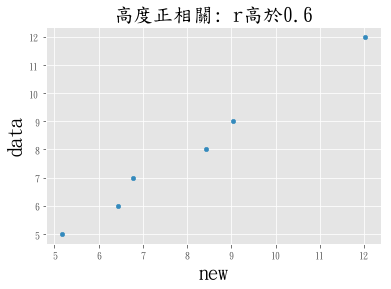

In [44]:
dfmm.plot(kind='scatter',x='new'  ,y='data' , figsize=(6,4))
plt.title('高度正相關: r高於0.6',color='black',size=20)
plt.xlabel('new',size=20,color='black')
plt.ylabel('data',color='black',size=20)

Text(0,0.5,'data')

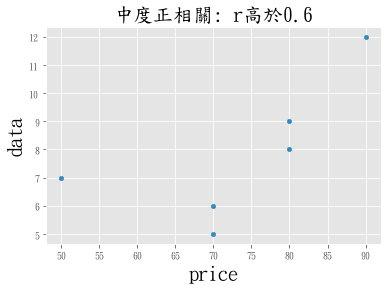

In [46]:
dfmm.plot(kind='scatter',x='price'  ,y='data' , figsize=(6,4))
plt.title('中度正相關: r高於0.6',color='black',size=20)
plt.xlabel('price',size=20,color='black')
plt.ylabel('data',color='black',size=20)

In [47]:
dfmm

,data,key,price,new
0,8,A,80,8.434134
1,7,B,50,6.786103
2,12,C,90,12.031133
3,9,A,80,9.040578
4,5,B,70,5.160869
5,6,C,70,6.440439
